## Predicting Heart Disease using Machine Learning
This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine leaerning model capable of predicting whether or not someone has heart disease based on their medical attribbutes.

We're going to take following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentations

## 1. Problem Defination
In a statement,
* Given clinical parameters about a patient, we can predict whether or not they have heart disease?

## 2. Data
You can find this data : https://archive.ics.uci.edu/dataset/45/heart+disease

You can also see this in Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evalution
> If we can reach 95% accuracy at predicting whether or not a patient has heart-disease during the proof of concept, we'll pursue the project

## 4. Features
This is where you'll get the different information about each of the features in your data.

**Create Data Dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years
* origin (place of study)
* sex (1 == Male/ 0 == Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute


## Preparing the tool

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
# Import all the tool we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprossing data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.shape

(303, 14)

### Data Exploration (Exploratory data analysis or EDA)
The goal here is to find more about the data and become a subject matter expart on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(heart_disease)
# report.to_file(output_file = "heart-disease.html")

In [6]:
## Heart disease frequency according to Sex
heart_disease.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

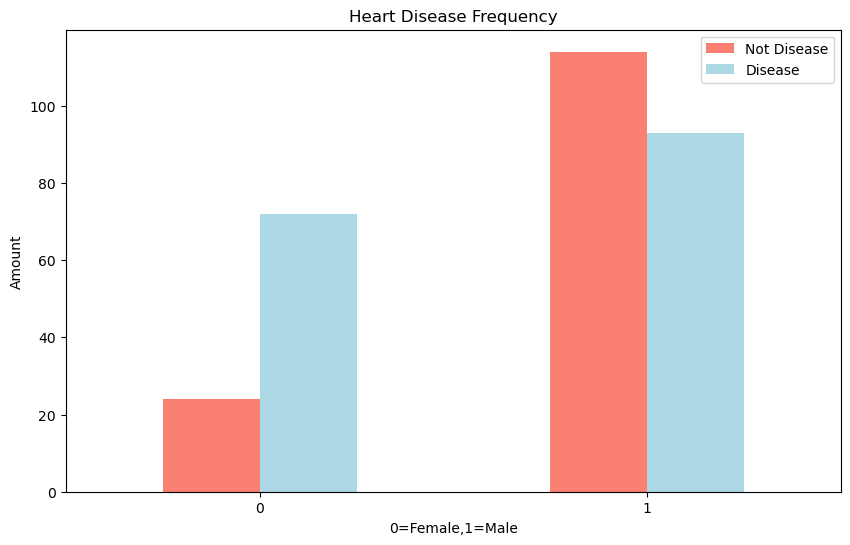

In [7]:
# compare target column with sex column
pd.crosstab(heart_disease.sex, heart_disease.target).plot(kind='bar',
                                                          figsize=(10,6),
                                                          color=["salmon","lightblue"])
plt.title("Heart Disease Frequency")
plt.xlabel("0=Female,1=Male")
plt.ylabel("Amount")
plt.legend(['Not Disease','Disease'])
plt.xticks(rotation=0);

In [8]:
pd.crosstab(heart_disease.sex, heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


<Axes: xlabel='chol', ylabel='cp'>

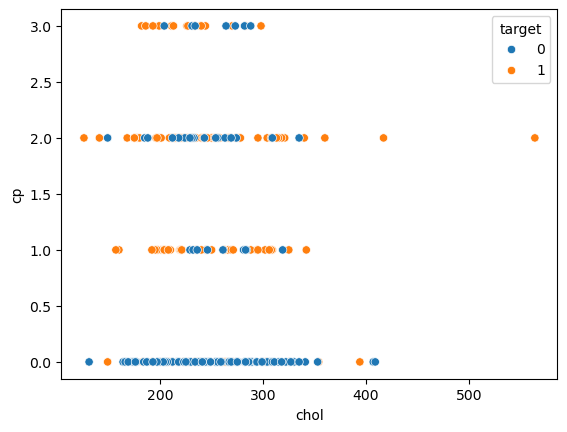

In [9]:
sns.scatterplot(x=heart_disease.chol, y=heart_disease.cp,hue=heart_disease.target)

In [10]:
heart_disease.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

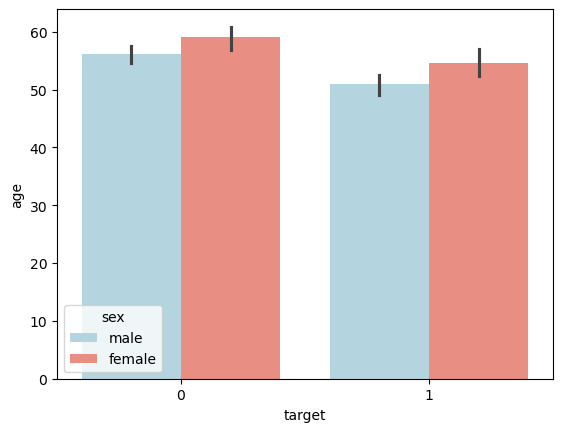

In [11]:
sns.barplot(x=heart_disease["target"],
            y=heart_disease["age"],
            hue=heart_disease["sex"].map({0: 'female', 1: 'male'}),
            palette={"female": "salmon", "male": "lightblue"});

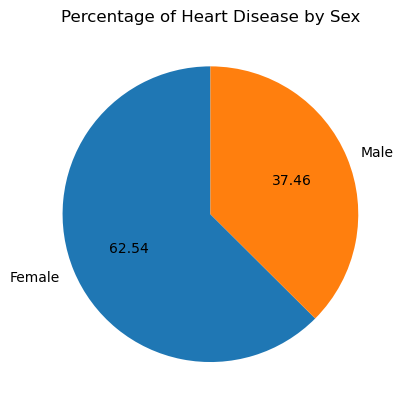

In [12]:
import matplotlib.pyplot as plt

# Mean target values (percentages of heart disease by sex)
target_means = heart_disease.groupby("sex")["target"].mean() * 100
target_means

# Plot the pie chart using raw values but show the actual percentages in labels
plt.pie(target_means, labels=['Female', 'Male'], autopct='%.2f', startangle=90)
plt.title('Percentage of Heart Disease by Sex');

### Age vs. Maximum Heart rate

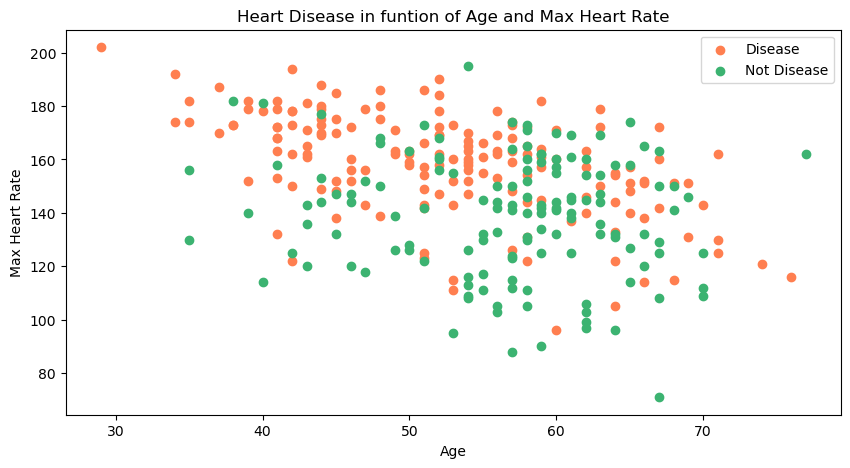

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

# Scatter with positive example
ax.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.thalach[heart_disease.target==1],
           c="Coral")

# Scatter with negative example
ax.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0],
           c="MediumSeaGreen")

# Add some helpful info
ax.set(title="Heart Disease in funtion of Age and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")
ax.legend(["Disease", "Not Disease"]);

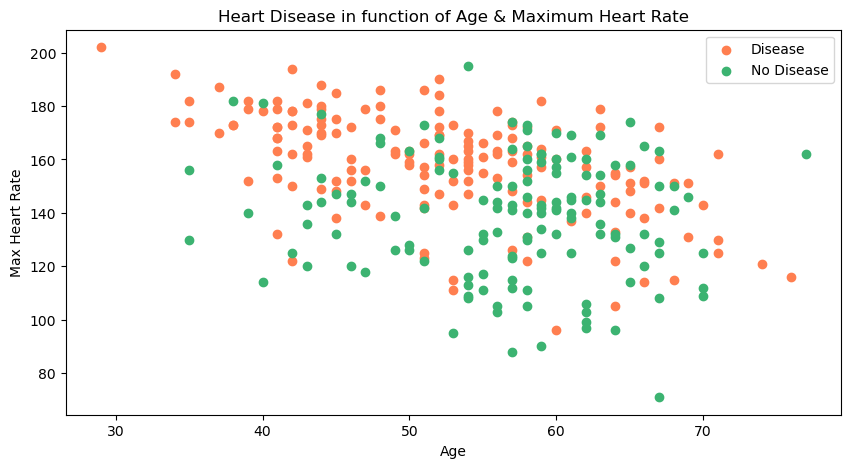

In [14]:
# Another way to do this
fig, ax = plt.subplots(figsize=(10,5))

# Scatter with Positive example
ax.scatter(x=heart_disease[heart_disease.target==1].age,
           y=heart_disease[heart_disease.target==1].thalach,
           c="Coral")

# Scatter with Negative example
ax.scatter(x=heart_disease[heart_disease.target==0].age,
           y=heart_disease[heart_disease.target==0].thalach,
           c="MediumSeaGreen")
# Add some helpful info
ax.set(title="Heart Disease in function of Age & Maximum Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")
ax.legend(["Disease", "No Disease"]);

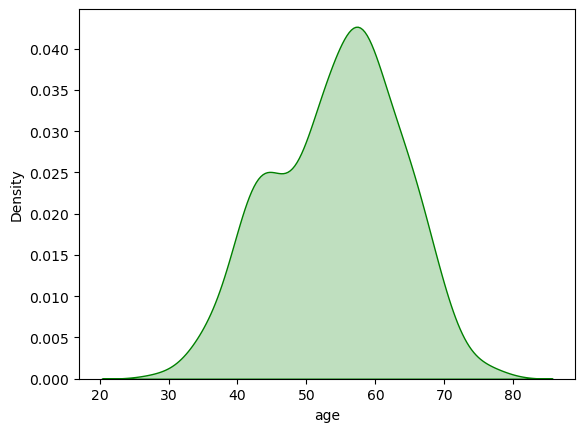

In [15]:
# Check the distribution of Age by kdeplot from sns
sns.kdeplot(heart_disease.age, color='green', fill=True);

In [16]:
heart_disease["age"].skew()

-0.2024633654856539

In [17]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


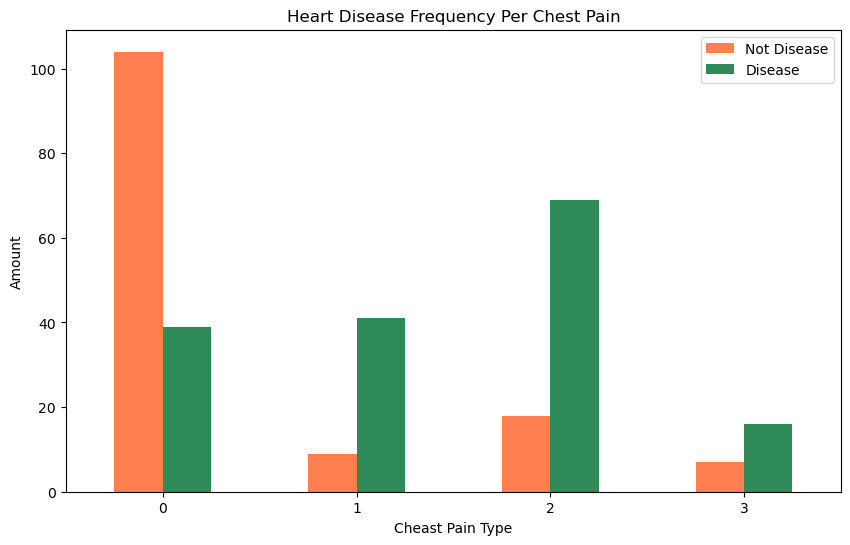

In [18]:
# Make the crosstab more visual
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar",color=["Coral","SeaGreen"], figsize=(10,6))
plt.title("Heart Disease Frequency Per Chest Pain")
plt.xlabel("Cheast Pain Type")
plt.ylabel("Amount")
plt.legend(["Not Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

In [19]:
# Make a corelation matrix
corr_matrix = heart_disease.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


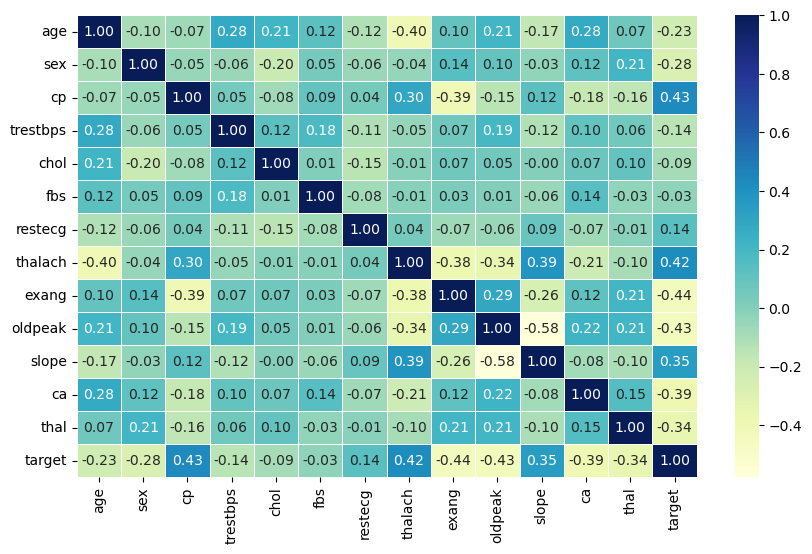

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt=".2f",
            cmap="YlGnBu");

### Modeling

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split our data into Features (X) & Labels (y)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split our data into train & test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

* Now we've our data into train & test sets. Now it's time to build our Machine Learnning Model
* We'll train it (For finding patterns) on training sets
* We'll test it (Use the patterns) on the test sets
  

We're going to use 3 different Machine Learning Model:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier
   

In [25]:
# Create Instances of Moodel
clf = {"LR": LogisticRegression(max_iter=1000),
         "KNN":KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}

In [26]:
# Create a Evalution Function
def Evalute_preds(y_true, y_pred):
    Accuracy = round(accuracy_score(y_true, y_preds), 2)
    Precision = round(precision_score(y_true, y_preds), 2)
    Recall = round(recall_score(y_true, y_preds), 2)
    F1 = round(f1_score(y_true, y_preds), 2)

    preds_dict = {"Accuracy": Accuracy,
                  "Precision": Precision,
                  "Recall": Recall,
                  "F1": F1}

    print(f"Accuracy is : {Accuracy* 100}%")
    print(f"Precision is : {Precision *100}%")
    print(f"Recall is : {Recall *100}%")
    print(f"F1 is : {F1 *100}%")

    return preds_dict

In [27]:
# train the models
for name, model in clf.items():
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print(f"Using {name} classifier :")
    Evalute_preds(y_test, y_preds)
    print()

Using LR classifier :
Accuracy is : 89.0%
Precision is : 88.0%
Recall is : 91.0%
F1 is : 89.0%

Using KNN classifier :
Accuracy is : 69.0%
Precision is : 69.0%
Recall is : 75.0%
F1 is : 72.0%

Using RandomForest classifier :
Accuracy is : 85.0%
Precision is : 85.0%
Recall is : 88.0%
F1 is : 86.0%



Now we've got a baseline model ...and we know a model's first predictions are'nt always what we should based our next steps off.What should we do?

Lets look at the following :
1. Hyperparameter tuning
2. Feature importance
3. Cross validation
4. Confusion matrix
5. Precision score
6. Recall score
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AOC)

### Hyperparameter Tuning (by hand)

In [28]:
# Tuning KNN
train_scores = []
test_scores = []

neighbors = range(1,21)

# Make model instances
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data is : 75.41%


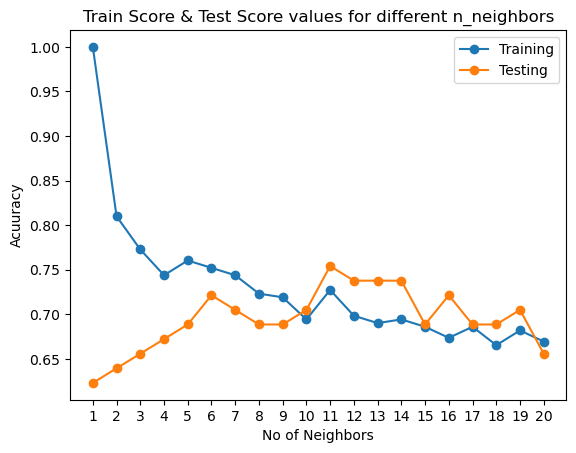

In [31]:
# Lets visualise this
fig, ax = plt.subplots()

ax.plot(neighbors, train_scores, marker='o')
ax.plot(neighbors, test_scores, marker='o')

ax.set(title="Train Score & Test Score values for different n_neighbors",
       xlabel="No of Neighbors",
       ylabel="Acuuracy")
ax.legend(["Training", "Testing"])
plt.xticks(np.arange(1,21,1));
print(f"Maximum KNN score on test data is : {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

..... using RandomizedSearchCV


In [32]:
# Create Hyperparamter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create Hyperparameter tuning for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 500, 50),
           "min_samples_leaf": np.arange(2, 20, 2),
           "min_samples_split": np.arange(2, 20, 2),
           "max_depth": [None, 3, 5, 10],
           "max_features": [None, "sqrt", "log2"]}

Now we've got hyperparameter grid of our each models.. let's tune them using RandomizedSearchCV

In [33]:
# Setup random seed
np.random.seed(42)

# Setup Randomized Search Hyperparameter for LogisticRegression
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                verbose=4,
                                n_jobs=-1,
                                cv=5)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=4)

In [34]:
# Evalute the tuned logistic reegression model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned Logistic Regression. Now its time for Random Forest Classifier

In [35]:
# Set up random seed
np.random.seed(43)

# Setup Randomized Search Hyperparameter for RandomForestClassifier
rs_rf_clf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               n_jobs=-1,
                               verbose=4)
rs_rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   verbose=4)

In [36]:
# Evalute the tuned RandomForestClassifier model
rs_rf_clf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV
Since our Logistic RegressIon model provides the best result so far, I'll try & impeove them again using GridSearchCV

In [37]:
# Different hyperparameter for our Logistic regression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['lbfgs','liblinear', 'saga']}

# Setup grid hyperparameter search for LoigisticRegression
gs_log_reg = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                          param_grid=log_reg_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             verbose=True)

In [38]:
# Evalute the tuned (by GridSearch) LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evalute our tuned machine learning classifier, beyond accuracy

* ROC curve AOC score
* Confusion Matrix
* Precision Score
* Recall Score
* F1-Score
* Classificaton Report

... and would be great if cross validaton was used where possible.

In [39]:
# Make Prediction on tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

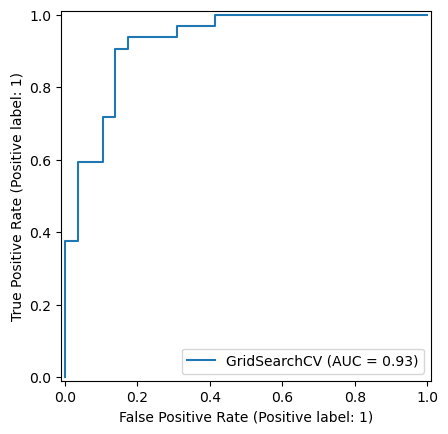

In [40]:
# Plot ROC Curve and calculate AOC Metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [41]:
positive_preds= gs_log_reg.predict_proba(X_test)[:, 1]

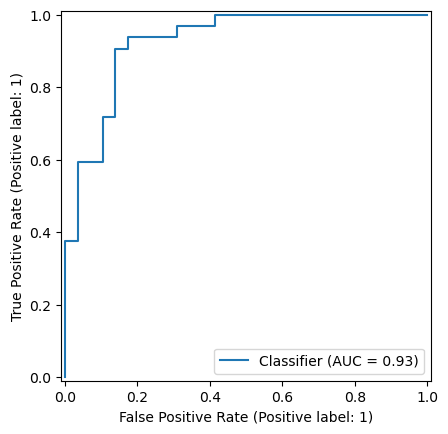

In [42]:
RocCurveDisplay.from_predictions(y_test, positive_preds )

In [43]:
# Comnfusion Matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

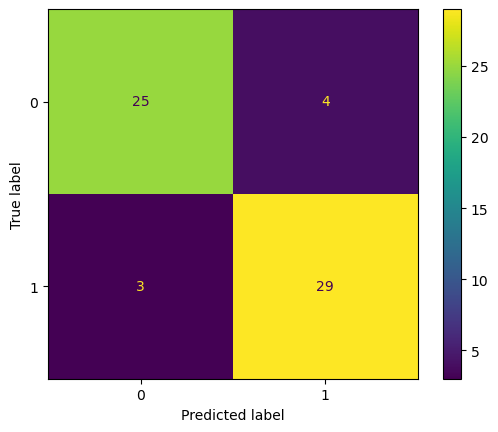

In [44]:
# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test);

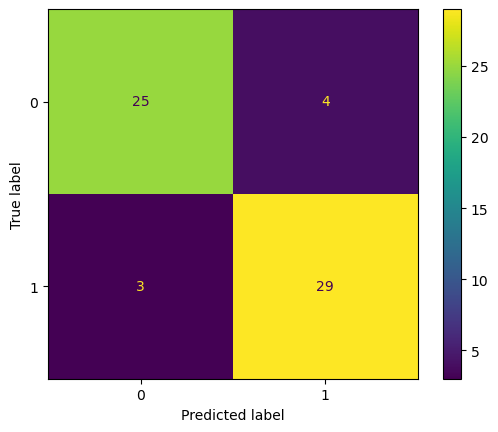

In [45]:
# Another way to plot
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

Now we've got ROC Curve, an AOC metric and confusion matrix let's time to show classification report as well as cross validated precision score, recall score
and F1-score

## Calculate Evalution metrics using cross-validation
We're going to calculate Accuracy, Precision, Recall, F1-score of our model using cross validation and to do so we'll be using `cross_val_score()`

In [46]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")


In [48]:
# Cross validated Accuracy
cv_acc = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [49]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [50]:
# Cross validated Precision
cv_precision = cross_val_score(estimator=clf,
                               X=X,
                               y=y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [51]:
# Cross Validated Recall
cv_recall = cross_val_score(estimator=clf,
                            X=X,
                            y=y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [52]:
# Cross validated F1-score
cv_f1 = cross_val_score(estimator=clf,
                        X=X,
                        y=y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [53]:
# Visualise cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


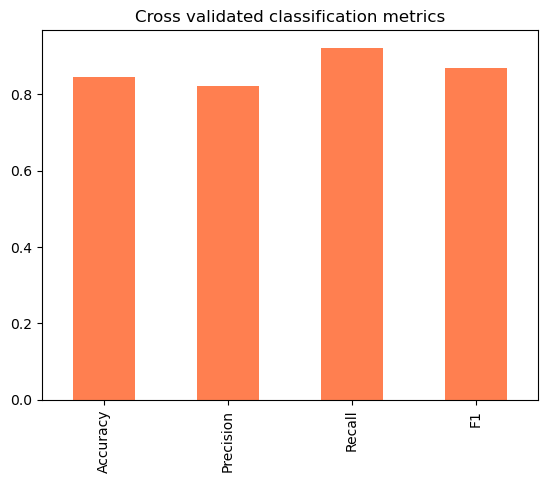

In [54]:
cv_metrics.T.plot(title="Cross validated classification metrics",
                  kind='bar',
                  color=['coral'],
                  legend=False);

## Featutre importance 
Feature importance is another as asking, "Which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance of our LogisticRegression model...

In [55]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [56]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [57]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Match coef of our features to columns
feature_dict = dict(zip(heart_disease.columns, clf.coef_[0]))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

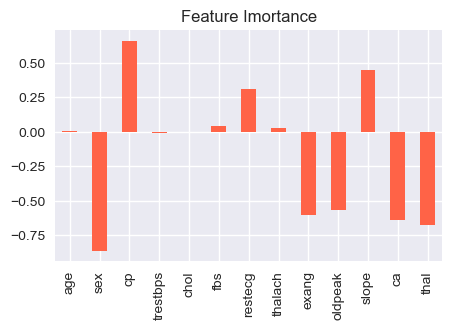

In [59]:
# Visualize the coef_
plt.style.use('seaborn-v0_8')
df = pd.DataFrame(feature_dict, index=[0])
df.T.plot(kind='bar',
          title="Feature Imortance",
          color='tomato',
          legend=False,
          figsize=(5,3));

## Experimentation
If you haven't hit your evalution metrics yet.. ask yourself...

* Could you collecte more data?
* Could you try a better model? like CatBoost, XGBoost
* Could you improve the current model? (beyond what we've done so far)
* If your model is good enough (you have hit your evalution metrics) how would you export it and share it with others?